# Lab 7 - Filtragem Digital

Esta atividade consiste em projetar diferentes filtros passa-faixa e filtrar o sinal

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro e Ândrei Camponogara*

In [1]:
from pylab import *
from scipy import signal

np.seterr(divide = 'ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

Considere o sinal $x[n]$ e sua respectiva DTFT $X(e^{j\omega}$) gerados logo abaixo. Então, realize as tarefas solicitadas em seguida.

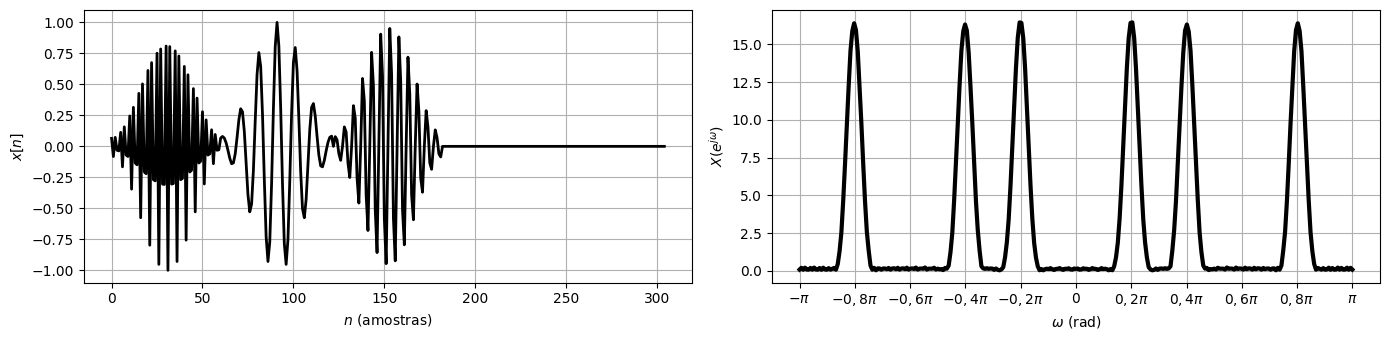

In [2]:
L = 61
n = arange(0,L)
w_n = 0.54 - 0.46*cos(2*np.pi*n/L)
x1 = w_n*cos(0.2*pi*n)
x2 = w_n*cos(0.4*pi*n-pi/2)
x3 = w_n*cos(0.8*pi*n+pi/5)

x = concatenate ((x3,x1,x2, zeros(2*L)))
X = fftshift(fft(x))
w = linspace(-pi, pi, len(X))

rotulos = [r"$-\pi$",r"$-0,8\pi$",r"$-0,6\pi$",r"$-0,4\pi$",r"$-0,2\pi$",r"$0$",r"$0,2\pi$",r"$0,4\pi$",r"$0,6\pi$",r"$0,8\pi$",r"$\pi$"]

fig,ax = subplots(1,2,figsize=(14,3.5))
ax[0].plot(x, 'k-', lw=2)
ax[0].set_xlabel(r'$n$ (amostras)')
ax[0].set_ylabel(r'$x[n]$')
ax[0].grid()
ax[1].plot(w/pi,abs(X), 'k-', lw=3)
ax[1].set_xlabel(r'$\omega$ (rad)')
ax[1].set_ylabel(r'$X(e^{j\omega})$')
ax[1].set_xticks(arange(-1,1.2,0.2), labels=rotulos)
ax[1].grid()
tight_layout()
show()


1) Projete um filtro FIR de ordem 9 para deixar passar somente a senoide de frequência $0.4\pi$ radianos, usando a função signal.firwin().

In [3]:
# Parâmetros do filtro
fs = 2  # Frequência de amostragem normalizada (Nyquist = 1)
M = 9  # Ordem do filtro
center_freq = 0.4  # Frequência central normalizada (0.4π rad/amostra = 0.4 na escala de Nyquist)
bandwidth = 0.085  # Largura de banda para o passa-faixa

# Calculando as frequências de corte
low_cutoff = center_freq - bandwidth / 2  # Limite inferior
high_cutoff = center_freq + bandwidth / 2  # Limite superior

# Design do filtro
fir_a = signal.firwin(numtaps=M + 1, cutoff=[low_cutoff, high_cutoff], pass_zero=False)

2) Projete um filtro IIR de ordem 9, semelhante ao anterior, usando a função signal.butter()

In [4]:
center_freq = 0.4  # Frequência central normalizada (0.4π rad/amostra = 0.4 na escala de Nyquist)
bandwidth = 0.2  # Largura de banda para o passa-faixa

# Calculando as frequências de corte
low_cutoff = center_freq - bandwidth / 2  # Limite inferior
high_cutoff = center_freq + bandwidth / 2  # Limite superior

# Design do filtro Butterworth passa-faixa
b, a = signal.butter(M, [low_cutoff, high_cutoff], btype='bandpass')

3) Plote o espectro do sinal $X(e^{j\omega})$ e a magnitude das respostas em frequência dos dois filtros.


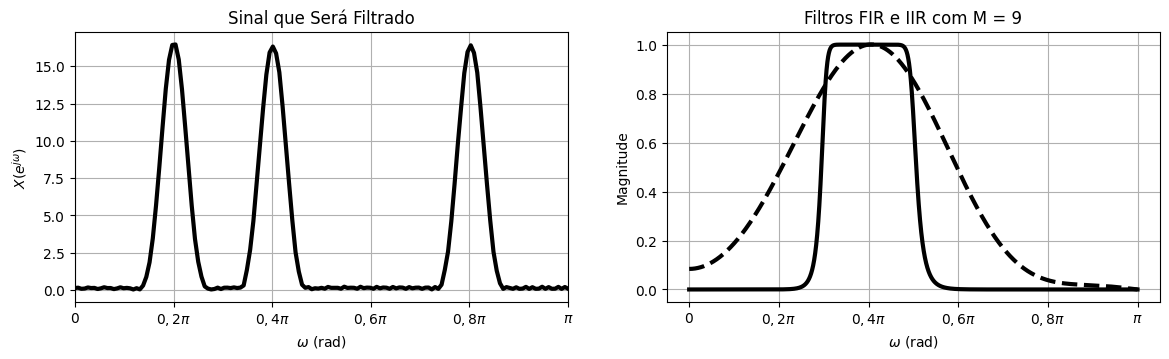

In [5]:
# Digite o código aqui
w1, H1 = signal.freqz(fir_a, worN=8000)
w2, H2 = signal.freqz(b, a, worN=8000)
# ----------------------------------------------------------------------------------
# FIGURAS
# ----------------------------------------------------------------------------------
rotulos = [r"$0$",r"$0,2\pi$",r"$0,4\pi$",r"$0,6\pi$",r"$0,8\pi$",r"$\pi$"]

fig,ax = subplots(1,2,figsize=(14,3.5))
ax[0].plot(w,abs(X), 'k-', lw=3)
ax[0].set_title("Sinal que Será Filtrado")
ax[0].set_xlabel(r'$\omega$ (rad)')
ax[0].set_ylabel(r'$X(e^{j\omega})$')
ax[0].set_xlim(0,pi)
ax[0].set_xticks(linspace(0,pi,len(rotulos)), labels=rotulos)
ax[0].grid()
ax[1].plot(w1,abs(H1), 'k--', lw=3, label='FIR')
ax[1].plot(w2,abs(H2), 'k-', lw=3, label='IIR')
ax[1].set_xticks(linspace(0,pi,len(rotulos)), labels=rotulos)
ax[1].set_title("Filtros FIR e IIR com M = {}".format(M))
ax[1].set_xlabel(r'$\omega$ (rad)')
ax[1].set_ylabel('Magnitude')
ax[1].grid()
show()



4) Plote os diagramas de polos e zeros dos filtros FIR e IIR passa-faixas. Use a função planoz() definida abaixo para gerar as figuras e a função signal.tf2zpk() para o obter os polos e zeros a partir dos coeficientes do respectivo filtro.

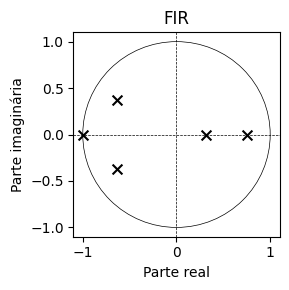

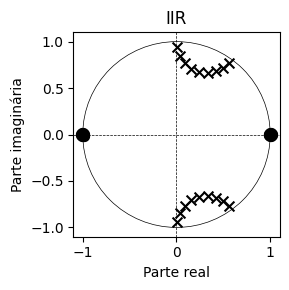

In [6]:
# ----------------------------------------------------------------------------------
# FUNÇÃO
# ----------------------------------------------------------------------------------
def planoz(zeros, polos, titulo=''):    
    figure(figsize=(3,3))
    axhline(0, color='black', lw=0.5, linestyle='--')  
    axvline(0, color='black', lw=0.5,linestyle='--') 
    unit_circle = Circle((0, 0), 1, color='black', fill=False, linestyle='-', lw=0.5)
    gca().add_artist(unit_circle)
    scatter(zeros.real, zeros.imag, s=50, color='black', marker='o', label='Zeros')
    scatter(polos.real, polos.imag, s=50, color='black', marker='x', label='Polos')
    xlim(-1.1, 1.1)
    ylim(-1.1, 1.1)
    xlabel('Parte real',fontsize=10)
    ylabel('Parte imaginária',fontsize=10)
    title(titulo)
    tight_layout()

# ----------------------------------------------------------------------
# Digite o código aqui
z1, p1, k1 = signal.tf2zpk(1, fir_a)
z2, p2, k2 = signal.tf2zpk(b, a)

planoz(z1, p1, "FIR")
planoz(z2, p2, "IIR")


5) Filtre o sinal pelos coeficientes com cada filtro, e plote os dois resultados no mesmo eixo:<br>
   a) No tempo: $y_1[n],y_2[n]$ <br>
   b) Em frequência: magnitudes de $Y_1(e^{j\omega}),Y_2(e^{j\omega})$ <br>


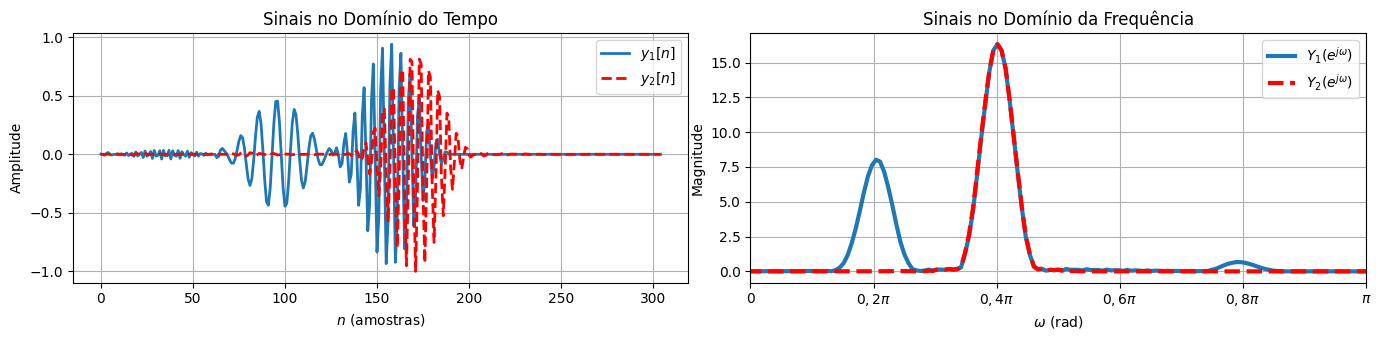

In [7]:
# Digite o código aqui

y1 = signal.lfilter(fir_a, [1], x)  # FIR
y2 = signal.lfilter(b, a, x)            # IIR

# ----------------------------------------------------------------------------------
# FIGURAS
# ----------------------------------------------------------------------------------
fig,ax = subplots(1,2,figsize=(14,3.5))
ax[0].plot(y1, '-', lw=2, label=r'$y_1[n]$')
ax[0].plot(y2, 'r--', lw=2, label=r'$y_2[n]$')
ax[0].set_title('Sinais no Domínio do Tempo')
ax[0].set_xlabel(r'$n$ (amostras)')
ax[0].set_ylabel('Amplitude')
ax[0].grid()
ax[0].legend()
ax[1].plot(w, abs(fftshift(fft(y1))), '-', lw=3, label=r'$Y_1(e^{j\omega})$')
ax[1].plot(w, abs(fftshift(fft(y2))), 'r--', lw=3, label=r'$Y_2(e^{j\omega})$')
ax[1].set_xlim(0,pi)
ax[1].set_xticks(linspace(0,pi,len(rotulos)), labels=rotulos)
ax[1].set_title("Sinais no Domínio da Frequência")
ax[1].set_xlabel(r'$\omega$ (rad)')
ax[1].set_ylabel(r'Magnitude')
ax[1].grid()
ax[1].legend()

tight_layout()
show()

6) Qual dos dois filtros rejeitou melhor as frequências baixa e alta ?


**Resposta:** O filtro *IIR* rejeitou melhor as frequências alta e baixa.

Resposta: 

7) Projete quatro filtros passa-altas de ordem $M=3$ e frequência de corte $\omega_c= 0,7\pi$. (butter, cheby1, cheby2, ellip).
Plote no mesmo eixo a magnitude das respostas em frequência de $0$ a $\pi$. Plote também o ganho de cada filtro em dB para frequências de $0$ a $\pi$.

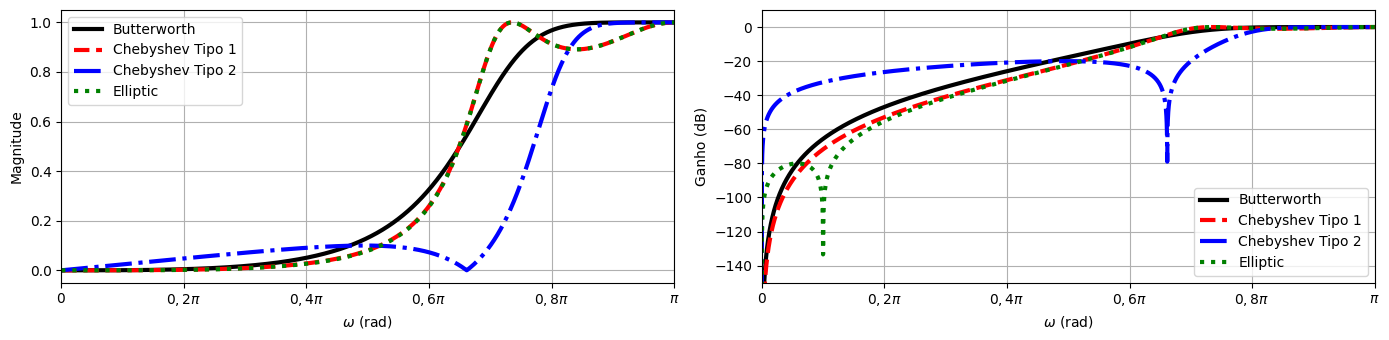

In [8]:
# Digite o código aqui
order = 3  # Ordem do filtro
cutoff = 0.7  # Frequência de corte normalizada (0.7π rad/amostra = 0.7 na escala de Nyquist)

b_butter, a_butter = signal.butter(order, cutoff, btype='highpass')
b_cheby1, a_cheby1 = signal.cheby1(order, 1, cutoff, btype='highpass')
b_cheby2, a_cheby2 = signal.cheby2(order, 20, cutoff, btype='highpass')
b_ellip, a_ellip = signal.ellip(order, 1, 80, cutoff, btype='highpass')

w1, H_butter = signal.freqz(b_butter, a_butter, worN=8000)
_, H_cheby1 = signal.freqz(b_cheby1, a_cheby1, worN=8000)
_, H_cheby2 = signal.freqz(b_cheby2, a_cheby2, worN=8000)
_, H_ellip = signal.freqz(b_ellip, a_ellip, worN=8000)

# ----------------------------------------------------------------------------------
# FIGURAS
# ----------------------------------------------------------------------------------
fig,ax = subplots(1,2,figsize=(14,3.5))
ax[0].plot(w1,abs(H_butter), 'k-', lw=3, label='Butterworth')
ax[0].plot(w1,abs(H_cheby1), 'r--', lw=3, label='Chebyshev Tipo 1')
ax[0].plot(w1,abs(H_cheby2), 'b-.', lw=3, label='Chebyshev Tipo 2')
ax[0].plot(w1,abs(H_ellip), 'g:', lw=3, label='Elliptic')
ax[0].set_xlim(0,pi)
ax[0].set_xticks(linspace(0,pi,len(rotulos)), labels=rotulos)
ax[0].set_xlabel(r'$\omega$ (rad)')
ax[0].set_ylabel(r'Magnitude')
ax[0].grid()
ax[0].legend()
ax[1].plot(w1, 20*log10(abs(H_butter)), 'k-', lw=3, label='Butterworth')
ax[1].plot(w1, 20*log10(abs(H_cheby1)), 'r--', lw=3, label='Chebyshev Tipo 1')
ax[1].plot(w1, 20*log10(abs(H_cheby2)), 'b-.', lw=3, label='Chebyshev Tipo 2')
ax[1].plot(w1, 20*log10(abs(H_ellip)), 'g:', lw=3, label='Elliptic')
ax[1].set_xlim(0,pi)
ax[1].set_ylim(-150,10)
ax[1].set_xticks(linspace(0,pi,len(rotulos)), labels=rotulos)
ax[1].set_xlabel(r'$\omega$ (rad)')
ax[1].set_ylabel(r'Ganho (dB)')
ax[1].grid()
ax[1].legend()

tight_layout()
show()

8) Plote os diagramas de polos e zeros dos filtros IIR passa-altas

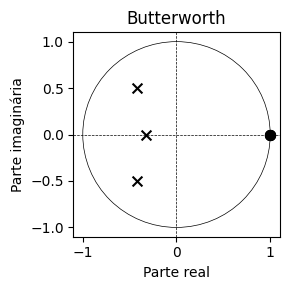

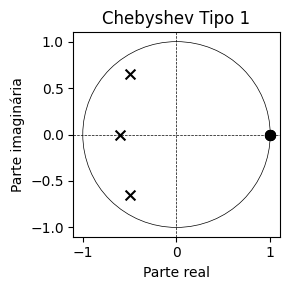

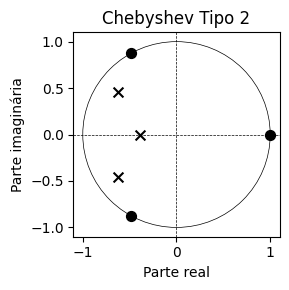

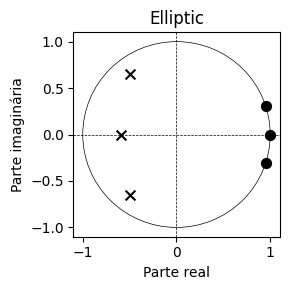

In [9]:
# Digite o código aqui
z_butter, p_butter, _ = signal.tf2zpk(b_butter, a_butter)
z_cheby1, p_cheby1, _ = signal.tf2zpk(b_cheby1, a_cheby1)
z_cheby2, p_cheby2, _ = signal.tf2zpk(b_cheby2, a_cheby2)
z_ellip, p_ellip, _ = signal.tf2zpk(b_ellip, a_ellip)
planoz(z_butter, p_butter, "Butterworth")
planoz(z_cheby1, p_cheby1, "Chebyshev Tipo 1")
planoz(z_cheby2, p_cheby2, "Chebyshev Tipo 2")
planoz(z_ellip, p_ellip, "Elliptic")

9) Filtre o sinal pelos coeficientes com cada filtro IIR passa-altas e plote os dois resultados no mesmo eixo:<br>
   a) No tempo, apenas as primeiras 180 amostras: $y_{butter}[n],y_{cheb1}[n],y_{cheb2}[n],y_{ellip}[n]$ <br>
   b) Em frequência: magnitudes de $Y_{butter}(e^{j\omega}),Y_{cheby1}(e^{j\omega})$, $Y_{cheby2}(e^{j\omega})$, $Y_{ellip}(e^{j\omega})$ <br>

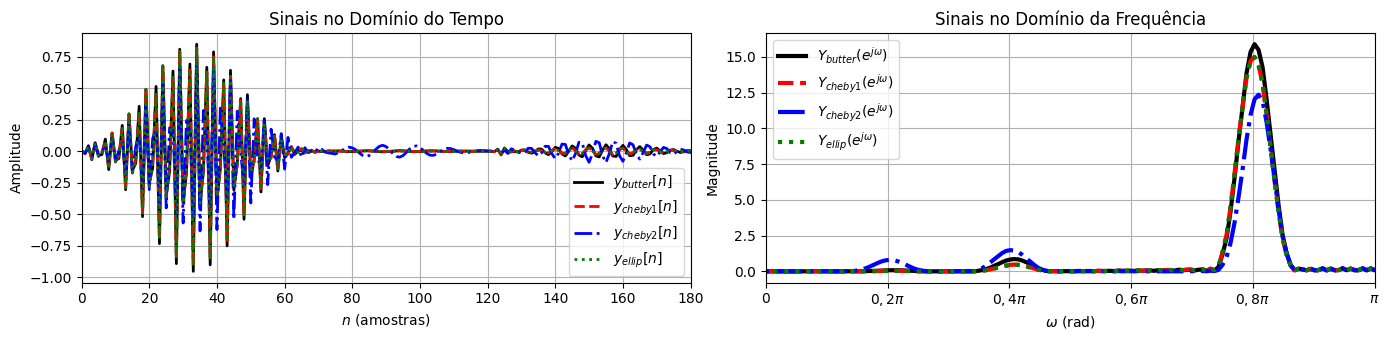

In [10]:
# Digite o código aqui

y_butter = signal.lfilter(b_butter, a_butter, x)           # Butterworth
y_cheby1 = signal.lfilter(b_cheby1, a_cheby1, x)            # Chebyshev Tipo 1
y_cheby2 = signal.lfilter(b_cheby2, a_cheby2, x)            # Chebyshev Tipo 2
y_ellip = signal.lfilter(b_ellip, a_ellip, x)               # Elípico

Y_butter_mag = abs(fftshift(fft(y_butter)))
Y_cheby1_mag = abs(fftshift(fft(y_cheby1)))
Y_cheby2_mag = abs(fftshift(fft(y_cheby2)))
Y_ellip_mag = abs(fftshift(fft(y_ellip)))

# ----------------------------------------------------------------------------------
# FIGURAS
# ----------------------------------------------------------------------------------
fig,ax = subplots(1,2,figsize=(14,3.5))
ax[0].plot(y_butter, 'k-', lw=2, label=r'$y_{butter}[n]$')
ax[0].plot(y_cheby1, 'r--', lw=2, label=r'$y_{cheby1}[n]$')
ax[0].plot(y_cheby2, 'b-.', lw=2, label=r'$y_{cheby2}[n]$')
ax[0].plot(y_ellip, 'g:', lw=2, label=r'$y_{ellip}[n]$')
ax[0].set_xlim(0,180)
ax[0].set_title('Sinais no Domínio do Tempo')
ax[0].set_xlabel(r'$n$ (amostras)')
ax[0].set_ylabel('Amplitude')
ax[0].grid()
ax[0].legend()
ax[1].plot(w, Y_butter_mag[::-1], 'k-', lw=3, label=r'$Y_{butter}(e^{j\omega})$')
ax[1].plot(w, Y_cheby1_mag, 'r--', lw=3, label=r'$Y_{cheby1}(e^{j\omega})$')
ax[1].plot(w, Y_cheby2_mag, 'b-.', lw=3, label=r'$Y_{cheby2}(e^{j\omega})$')
ax[1].plot(w, Y_ellip_mag, 'g:', lw=3, label=r'$Y_{ellip}(e^{j\omega})$')
ax[1].set_xlim(0,pi)
ax[1].set_xticks(linspace(0,pi,len(rotulos)), labels=rotulos)
ax[1].set_title("Sinais no Domínio da Frequência")
ax[1].set_xlabel(r'$\omega$ (rad)')
ax[1].set_ylabel(r'Magnitude')
ax[1].grid()
ax[1].legend()

tight_layout()
show()

10) Na sua opinião, qual o filtro que obteve o PIOR resultado?

**Resposta:** o Filtro *Chebyshev Tipo 2* atenua muito o sinal, sendo o pior em performance.